In [46]:
import numpy as np
import bmi.wrapper
import matplotlib.collections
import cmocean


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xbeach = bmi.wrapper.BMIWrapper('xbeach')

In [4]:
xbeach.initialize('/Users/baart_f/src/sandbox-fm/tests/LargerModel4/params.txt')

In [5]:
xbeach.get_time_step()

-123.0

In [34]:
for i in range(100):    
    xbeach.update(600)
xbeach.get_current_time()

2199.9999999999995

In [35]:
data = {}
data['ravensburger'] = np.s_[10:60, 10:50]

# hh -> zs - zb
for var in ["zs", "zb", "u", "v", "x", "y", "hh", "H", "D"]:
    data[var] = xbeach.get_var(var)

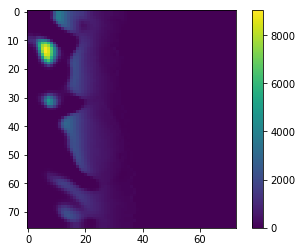

In [37]:
plt.imshow(data["D"][:,:])
plt.colorbar()

In [38]:
data['zb']

array([[-18.        , -17.99991356, -17.99950787, ...,  -4.4594769 ,
         -4.7355161 ,  -4.7355161 ],
       [-18.        , -17.99991356, -17.99950787, ...,  -4.4594769 ,
         -4.7355161 ,  -4.7355161 ],
       [-18.        , -17.99985397, -17.99947548, ...,  -4.4594769 ,
         -4.7355161 ,  -4.7355161 ],
       ..., 
       [-18.        , -17.99976388, -17.99922126, ...,  -1.2843433 ,
         -1.1597608 ,  -1.1597608 ],
       [-18.        , -17.99978145, -17.99923675, ...,  -1.664071  ,
         -1.5320816 ,  -1.5320816 ],
       [-18.        , -17.99978145, -17.99923675, ...,  -1.664071  ,
         -1.5320816 ,  -1.5320816 ]])

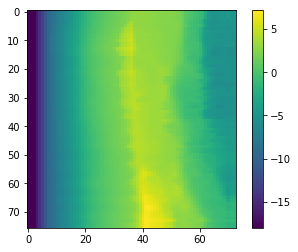

In [39]:
plt.imshow(data["zb"][:,:])
plt.colorbar()

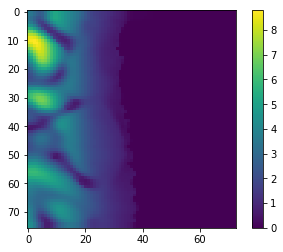

In [40]:
plt.imshow(data["H"][:,:])
plt.colorbar()

In [80]:
N = 100
x = np.zeros(N) + 3
y = np.linspace(5, 70, num=N)
xy = np.c_[x, y]
xy_idx = np.round(xy).astype('int')
H = data["H"][:,:]

h = H[xy_idx[:,1], xy_idx[:,0]]
D = data["D"][:,:]
d = D[xy_idx[:,1], xy_idx[:,0]]


338.72447167839238

In [117]:
segments = []
for i in range(N-1):
    segments.append([xy[i], xy[i+1]])
h_segments = (h[:-1] + h[1:])/2.0
d_segments = (d[:-1] + d[1:])/2.0
q95 = np.percentile(D.ravel(), 90)
D_N = matplotlib.colors.Normalize(0, q95)
D_cm = matplotlib.cm.Blues_r

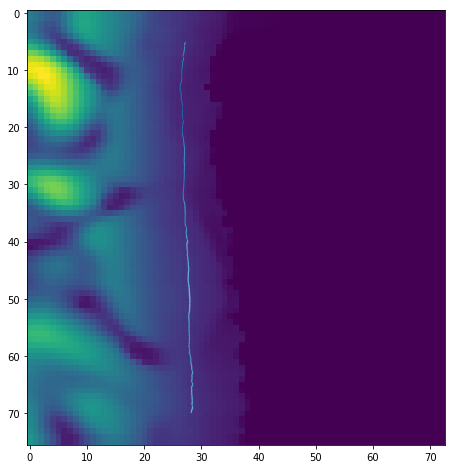

In [118]:
fig, ax = plt.subplots(figsize=(13, 8))
im = ax.imshow(data["H"][:,:])
line = matplotlib.collections.LineCollection(segments, linewidths=h_segments , colors=D_cm(D_N(d_segments)))
ax.add_collection(line)



In [58]:
cgx = xbeach.get_var('cgx')[0]
cgy = xbeach.get_var('cgy')[0]
data["cgx"] = cgx
data["cgy"] = cgy

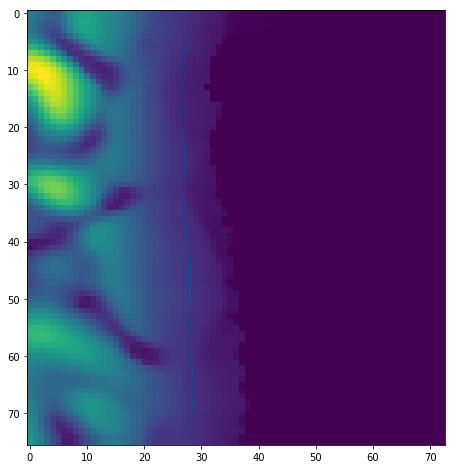

In [100]:
for i in range(1):
    xy_idx = np.round(xy).astype('int')
    cgx_i = data["cgx"][xy_idx[:, 1], xy_idx[:, 0]]
    cgy_i = data["cgy"][xy_idx[:, 1], xy_idx[:, 0]]

    scale = xbeach.get_time_step()
    xy = xy + np.c_[cgx_i, cgy_i] * scale

    xy_idx = np.round(xy).astype('int')
    h = data["H"][xy_idx[:,1], xy_idx[:,0]]
    h_segments = (h[:-1] + h[1:])/2.0  
    d = D[xy_idx[:,1], xy_idx[:,0]]
    d_segments = (d[:-1] + d[1:])/2.0



segments = []
for i in range(N-1):
    segments.append([xy[i], xy[i+1]])
line.set_segments(segments)
line.set_linewidths(h_segments)
line.set_color(D_cm(D_N(d_segments)))
plt.draw()
fig